This notebook performs exploratory data analysis (EDA) on the cleaned Spotify dataset to uncover insights and patterns.

**It orients around the following business questions:**

- What are the top 10 most streamed tracks in 2023?
- Which artists have the most streams in 2023?
- Is there a difference between different streaming platforms?
- How do the audio features (e.g., danceability, energy, valence) correlate with the number of streams?
- Are there any seasonal trends in music releases and streams throughout the year?
- Are there specific types of music in specific seasons that perform better?
- What distinguishes songs that just make the top list vs. those that dominate (e.g. top 10 vs. top 100)?
- Are there “outlier” songs (with unusual features) that still have very high streaming – what makes them succeed?
- Are there artists who consistently produce high-stream songs, and what are their common characteristics?
- When during the year are most songs released, and does this timing affect their streaming success?

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from setuptools.command.rotate import rotate

In [3]:
df = pd.read_csv('../data/processed/spotify_2023_cleaned.csv')
print(f'The dataframe consists of {len(df)} rows and {len(df.columns)} columns.')

The dataframe consists of 949 rows and 24 columns.


In [4]:
df.head()

,track_name,artist(s)_name,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,artist_count,released_year,released_month,released_day,...,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,speechiness_%,liveness_%,key,mode
0,'Till I Collapse,"Eminem, Nate Dogg",22923,1695712020,78,2515,2,2002,5,26,...,171,55,10,85,7,0,20,8,C#,Major
1,(It Goes Like) Nanana - Edit,Peggy Gou,2259,57876440,0,109,1,2023,6,15,...,130,67,96,88,12,19,4,8,G,Minor
2,10 Things I Hate About You,Leah Kate,1301,185550869,23,15,1,2022,3,23,...,154,54,45,79,1,0,5,17,G#,Major
3,10:35,"Tiï¿½ï¿½sto, Tate M",4942,325592432,190,147,2,2022,11,1,...,120,70,70,79,7,0,10,18,G#,Major
4,2 Be Loved (Am I Ready),Lizzo,3682,247689123,41,158,1,2022,7,14,...,156,72,92,77,9,0,11,8,G,Major


# What are the top 10 most streamed tracks in 2023?

In [4]:
df_tracks = df.copy()

In [5]:
top_tracks = df_tracks.sort_values(by='streams', ascending=False).head(10)
top_tracks['track_artist'] = top_tracks['track_name'] + ' - ' + top_tracks['artist(s)_name']
top_tracks

,track_name,artist(s)_name,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,artist_count,released_year,released_month,released_day,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,speechiness_%,liveness_%,key,mode,track_artist
100,Blinding Lights,The Weeknd,43899,3703895074,672,3421,1,2019,11,29,...,50,38,80,0,0,7,9,C#,Major,Blinding Lights - The Weeknd
699,Shape of You,Ed Sheeran,32181,3562543890,33,6808,1,2017,1,6,...,83,93,65,58,0,8,9,C#,Minor,Shape of You - Ed Sheeran
729,Someone You Loved,Lewis Capaldi,17836,2887241814,440,1800,1,2018,11,8,...,50,45,41,75,0,3,11,C#,Major,Someone You Loved - Lewis Capaldi
184,Dance Monkey,Tones and I,24529,2864791672,533,3595,1,2019,5,10,...,82,54,59,69,0,10,18,F#,Minor,Dance Monkey - Tones and I
759,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",24094,2808096550,372,843,2,2018,10,9,...,76,91,50,54,0,5,7,D,Major,Sunflower - Spider-Man: Into the Spider-Verse ...
569,One Dance,"Drake, WizKid, Kyla",43257,2713922350,433,3631,3,2016,4,4,...,77,36,63,1,0,5,36,C#,Major,"One Dance - Drake, WizKid, Kyla"
668,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",17050,2665343922,492,798,2,2021,7,9,...,59,48,76,4,0,5,10,C#,Major,"STAY (with Justin Bieber) - Justin Bieber, The..."
87,Believer,Imagine Dragons,18986,2594040133,250,2969,1,2017,1,31,...,77,74,78,4,0,11,23,A#,Minor,Believer - Imagine Dragons
153,Closer,"The Chainsmokers, Halsey",28032,2591224264,315,2179,2,2016,5,31,...,75,64,52,41,0,3,11,G#,Major,"Closer - The Chainsmokers, Halsey"
742,Starboy,"The Weeknd, Daft Punk",29536,2565529693,281,2445,2,2016,9,21,...,68,49,59,16,0,28,13,G,Major,"Starboy - The Weeknd, Daft Punk"


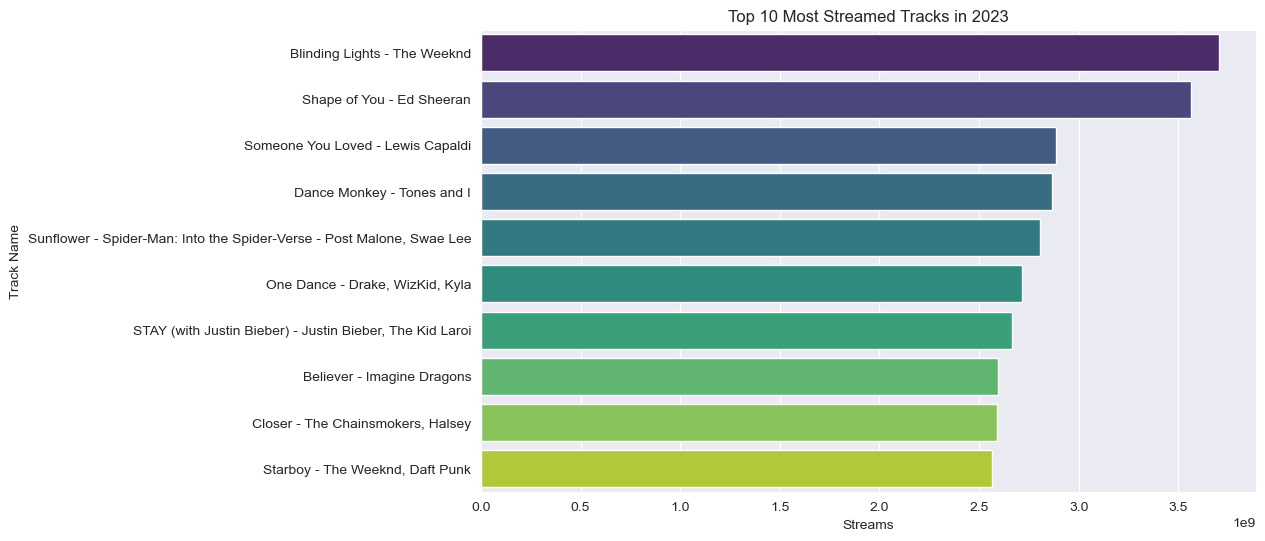

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='streams',
    y='track_artist',
    data=top_tracks,
    palette='viridis'
)
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.title('Top 10 Most Streamed Tracks in 2023')
plt.show()

# Which artists have the most streams in 2023?

In [64]:
df_artists = df.copy()

In [65]:
df_artists['artist_list'] = df_artists['artist(s)_name'].str.split(',')
df_exploded = df_artists.explode('artist_list')
df_exploded['artist'] = df_exploded['artist_list'].str.strip()
df_exploded = df_exploded.drop(columns=['artist_list'])
df_exploded

,track_name,artist(s)_name,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,artist_count,released_year,released_month,released_day,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,speechiness_%,liveness_%,key,mode,artist
0,'Till I Collapse,"Eminem, Nate Dogg",22923,1695712020,78,2515,2,2002,5,26,...,55,10,85,7,0,20,8,C#,Major,Eminem
0,'Till I Collapse,"Eminem, Nate Dogg",22923,1695712020,78,2515,2,2002,5,26,...,55,10,85,7,0,20,8,C#,Major,Nate Dogg
1,(It Goes Like) Nanana - Edit,Peggy Gou,2259,57876440,0,109,1,2023,6,15,...,67,96,88,12,19,4,8,G,Minor,Peggy Gou
2,10 Things I Hate About You,Leah Kate,1301,185550869,23,15,1,2022,3,23,...,54,45,79,1,0,5,17,G#,Major,Leah Kate
3,10:35,"Tiï¿½ï¿½sto, Tate M",4942,325592432,190,147,2,2022,11,1,...,70,70,79,7,0,10,18,G#,Major,Tiï¿½ï¿½sto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,you broke me first,Tate McRae,6638,1180094974,167,318,1,2020,4,17,...,64,8,37,79,0,5,9,E,Major,Tate McRae
945,ýýý98 Braves,Morgan Wallen,282,56533272,6,0,1,2023,3,3,...,49,48,67,10,0,3,26,D,Major,Morgan Wallen
946,ýýýabcdefu,Gayle,7215,1007612429,170,575,1,2021,8,13,...,70,42,54,30,0,5,37,E,Major,Gayle
947,ýýýýýýýýýýýý,YOASOBI,356,143573775,35,8,1,2023,4,12,...,57,84,94,11,0,9,37,C#,Major,YOASOBI


In [66]:
df_artists_grouped = df_exploded.groupby('artist').agg(
    total_streams=('streams', 'sum'),
    track_count=('streams', 'count')
).reset_index()
top_artists = df_artists_grouped.sort_values(by='total_streams', ascending=False).head(20)

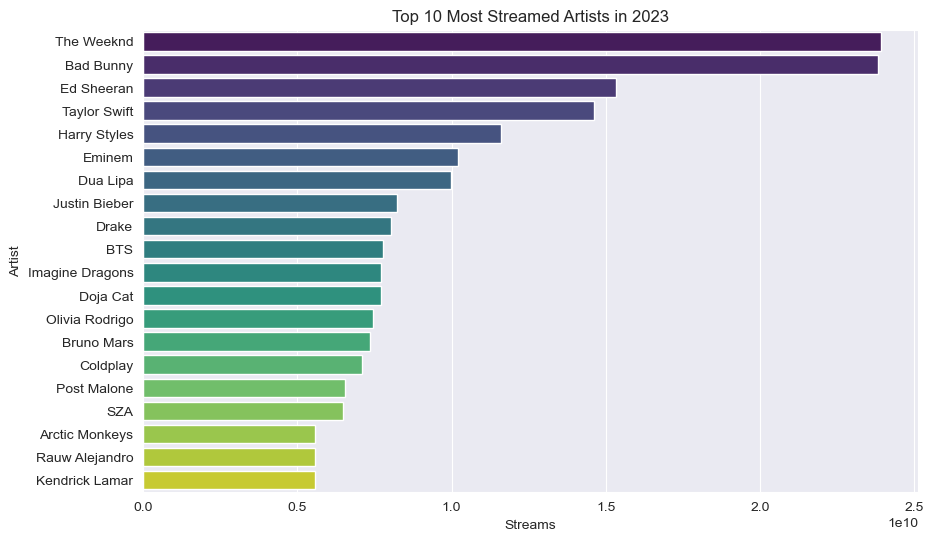

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='total_streams',
    y='artist',
    data=top_artists,
    palette='viridis'
)
plt.xlabel('Streams')
plt.ylabel('Artist')
plt.title('Top 10 Most Streamed Artists in 2023')
plt.show()

In [12]:
artist_boxstats = df_exploded.groupby('artist')['streams'].describe()

artist_boxstats = artist_boxstats[['min', '25%', '50%', '75%', 'max']].reset_index()
artist_boxstats = artist_boxstats.rename(columns={'25%':'Q1', '50%':'Median', '75%':'Q3'})

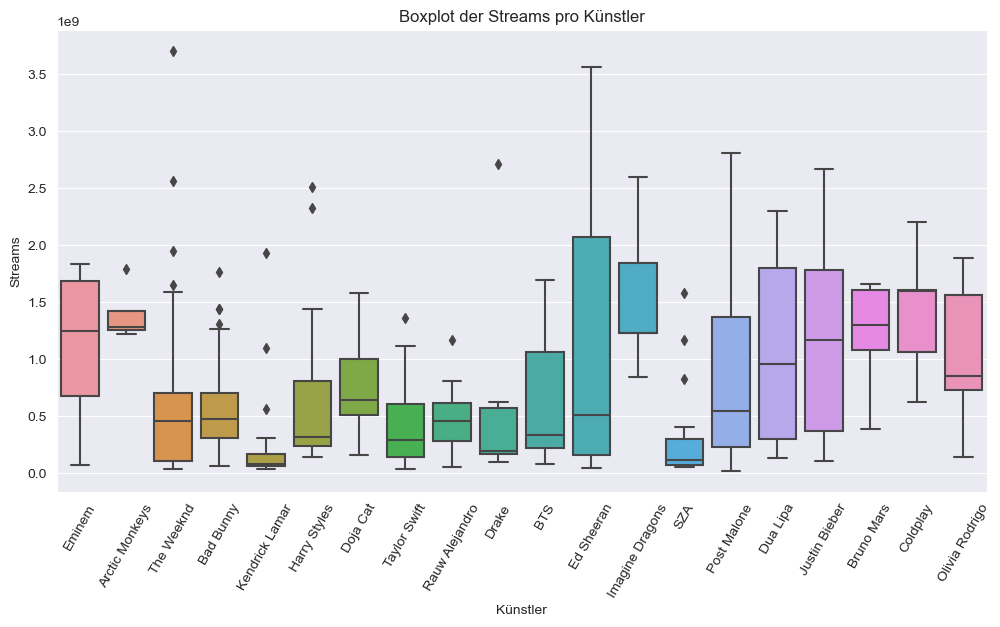

In [13]:
df_top = df_exploded[df_exploded['artist'].isin(top_artists['artist'])]

plt.figure(figsize=(12,6))
sns.boxplot(
    x='artist',
    y='streams',
    data=df_top
)
plt.xticks(rotation=60)
plt.title('Boxplot der Streams pro Künstler')
plt.ylabel('Streams')
plt.xlabel('Künstler')
plt.show()

# Is there a difference between different streaming platforms?

In [24]:
df_streaming = df.copy()

In [25]:
df_streaming

,track_name,artist(s)_name,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,artist_count,released_year,released_month,released_day,...,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,speechiness_%,liveness_%,key,mode
0,'Till I Collapse,"Eminem, Nate Dogg",22923,1695712020,78,2515,2,2002,5,26,...,171,55,10,85,7,0,20,8,C#,Major
1,(It Goes Like) Nanana - Edit,Peggy Gou,2259,57876440,0,109,1,2023,6,15,...,130,67,96,88,12,19,4,8,G,Minor
2,10 Things I Hate About You,Leah Kate,1301,185550869,23,15,1,2022,3,23,...,154,54,45,79,1,0,5,17,G#,Major
3,10:35,"Tiï¿½ï¿½sto, Tate M",4942,325592432,190,147,2,2022,11,1,...,120,70,70,79,7,0,10,18,G#,Major
4,2 Be Loved (Am I Ready),Lizzo,3682,247689123,41,158,1,2022,7,14,...,156,72,92,77,9,0,11,8,G,Major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,you broke me first,Tate McRae,6638,1180094974,167,318,1,2020,4,17,...,124,64,8,37,79,0,5,9,E,Major
945,ýýý98 Braves,Morgan Wallen,282,56533272,6,0,1,2023,3,3,...,142,49,48,67,10,0,3,26,D,Major
946,ýýýabcdefu,Gayle,7215,1007612429,170,575,1,2021,8,13,...,122,70,42,54,30,0,5,37,E,Major
947,ýýýýýýýýýýýý,YOASOBI,356,143573775,35,8,1,2023,4,12,...,166,57,84,94,11,0,9,37,C#,Major


In [27]:
df_streaming_short = df_streaming[['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]
df_streaming_short

,track_name,artist(s)_name,streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
0,'Till I Collapse,"Eminem, Nate Dogg",1695712020,22923,78,2515,0,46,1,0.0
1,(It Goes Like) Nanana - Edit,Peggy Gou,57876440,2259,0,109,59,0,17,0.0
2,10 Things I Hate About You,Leah Kate,185550869,1301,23,15,0,1,0,0.0
3,10:35,"Tiï¿½ï¿½sto, Tate M",325592432,4942,190,147,26,104,18,63.0
4,2 Be Loved (Am I Ready),Lizzo,247689123,3682,41,158,6,0,2,68.0
...,...,...,...,...,...,...,...,...,...,...
944,you broke me first,Tate McRae,1180094974,6638,167,318,0,19,0,1.0
945,ýýý98 Braves,Morgan Wallen,56533272,282,6,0,0,15,0,0.0
946,ýýýabcdefu,Gayle,1007612429,7215,170,575,0,12,18,NaN
947,ýýýýýýýýýýýý,YOASOBI,143573775,356,35,8,16,102,1,117.0


In [35]:
sum_spotify_playlists = df_streaming_short['in_spotify_playlists'].sum()
sum_apple_playlists = df_streaming_short['in_apple_playlists'].sum()
sum_deezer_playlists = df_streaming_short['in_deezer_playlists'].sum()

print(f'Sum Spotify Playlists: {sum_spotify_playlists}')
print(f'Sum Apple Playlists: {sum_apple_playlists}')
print(f'Sum Deezer Playlists: {sum_deezer_playlists}')

Sum Spotify Playlists: 4955719
Sum Apple Playlists: 64625
Sum Deezer Playlists: 367084


In [42]:
spotify_charts_null = df_streaming_short['in_spotify_charts'].isna().sum() + len(df_streaming_short[df_streaming_short['in_spotify_charts'] == 0])
apple_charts_null = df_streaming_short['in_apple_charts'].isna().sum() + len(df_streaming_short[df_streaming_short['in_apple_charts'] == 0])
deezer_charts_null = df_streaming_short['in_deezer_charts'].isna().sum() + len(df_streaming_short[df_streaming_short['in_deezer_charts'] == 0])
shazam_charts_null = df_streaming_short['in_shazam_charts'].isna().sum() + len(df_streaming_short[df_streaming_short['in_shazam_charts'] == 0])

print(f'Number of nulls in Spotify Charts: {spotify_charts_null}')
print(f'Number of nulls in Apple Charts: {apple_charts_null}')
print(f'Number of nulls in Deezer Charts: {deezer_charts_null}')
print(f'Number of nulls in Shazam Charts: {shazam_charts_null}')

Number of nulls in Spotify Charts: 401
Number of nulls in Apple Charts: 97
Number of nulls in Deezer Charts: 554
Number of nulls in Shazam Charts: 390


# How do the audio features correlate with the number of streams?

In [60]:
df_audio_features = df.copy()
df_audio_features

,track_name,artist(s)_name,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,artist_count,released_year,released_month,released_day,...,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,speechiness_%,liveness_%,key,mode
0,'Till I Collapse,"Eminem, Nate Dogg",22923,1695712020,78,2515,2,2002,5,26,...,171,55,10,85,7,0,20,8,C#,Major
1,(It Goes Like) Nanana - Edit,Peggy Gou,2259,57876440,0,109,1,2023,6,15,...,130,67,96,88,12,19,4,8,G,Minor
2,10 Things I Hate About You,Leah Kate,1301,185550869,23,15,1,2022,3,23,...,154,54,45,79,1,0,5,17,G#,Major
3,10:35,"Tiï¿½ï¿½sto, Tate M",4942,325592432,190,147,2,2022,11,1,...,120,70,70,79,7,0,10,18,G#,Major
4,2 Be Loved (Am I Ready),Lizzo,3682,247689123,41,158,1,2022,7,14,...,156,72,92,77,9,0,11,8,G,Major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,you broke me first,Tate McRae,6638,1180094974,167,318,1,2020,4,17,...,124,64,8,37,79,0,5,9,E,Major
945,ýýý98 Braves,Morgan Wallen,282,56533272,6,0,1,2023,3,3,...,142,49,48,67,10,0,3,26,D,Major
946,ýýýabcdefu,Gayle,7215,1007612429,170,575,1,2021,8,13,...,122,70,42,54,30,0,5,37,E,Major
947,ýýýýýýýýýýýý,YOASOBI,356,143573775,35,8,1,2023,4,12,...,166,57,84,94,11,0,9,37,C#,Major


In [61]:
df_audio_features['mode'] = df_audio_features['mode'].map({'Major': 1, 'Minor': 0})

In [63]:
df_audio_features = df_audio_features[['streams', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'speechiness_%', 'liveness_%', 'mode']]

In [64]:
df_audio_features.corr()

,streams,danceability_%,energy_%,valence_%,acousticness_%,instrumentalness_%,speechiness_%,liveness_%,mode
streams,1.000000,-0.103390,-0.024820,-0.040974,-0.006644,-0.044159,-0.113030,-0.045490,0.041488
danceability_%,-0.103390,1.000000,0.197313,0.408055,-0.235759,-0.089345,0.185699,-0.077420,-0.137549
energy_%,-0.024820,0.197313,1.000000,0.357609,-0.577227,-0.037182,-0.004156,0.117077,-0.054970
valence_%,-0.040974,0.408055,0.357609,1.000000,-0.081411,-0.133217,0.041383,0.020844,-0.064420
acousticness_%,-0.006644,-0.235759,-0.577227,-0.081411,1.000000,0.043221,-0.023780,-0.048634,0.063783
instrumentalness_%,-0.044159,-0.089345,-0.037182,-0.133217,0.043221,1.000000,-0.083550,-0.044954,-0.011234
speechiness_%,-0.113030,0.185699,-0.004156,0.041383,-0.023780,-0.083550,1.000000,-0.021647,-0.095419
liveness_%,-0.045490,-0.077420,0.117077,0.020844,-0.048634,-0.044954,-0.021647,1.000000,0.002698
mode,0.041488,-0.137549,-0.054970,-0.064420,0.063783,-0.011234,-0.095419,0.002698,1.000000


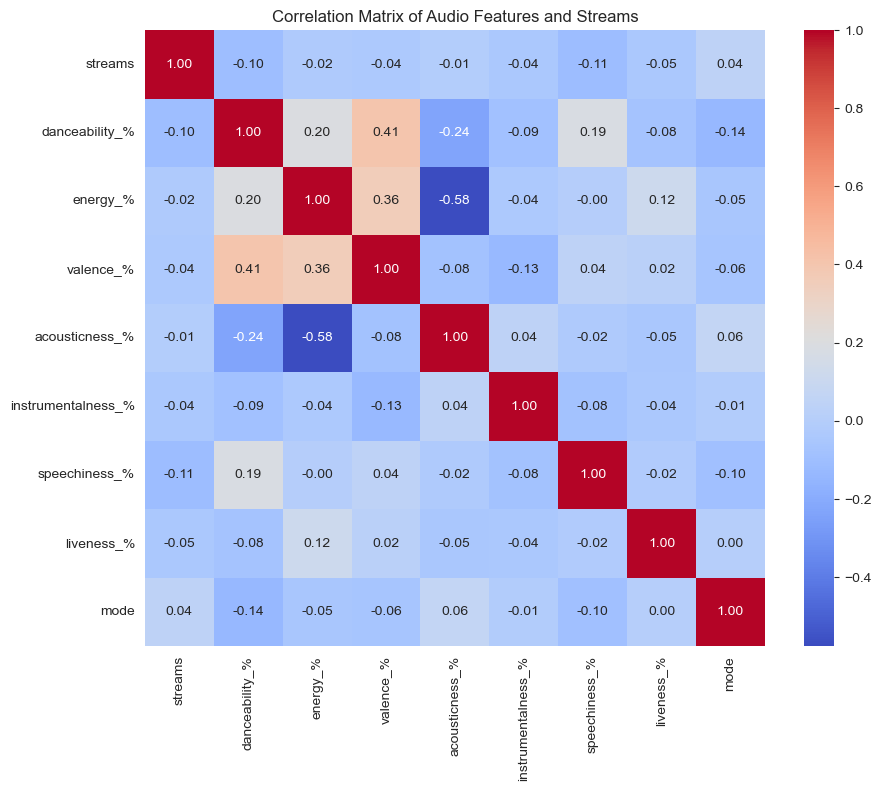

In [65]:
plt.figure(figsize=(10,8))
correlation_matrix = df_audio_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features and Streams')
plt.show()

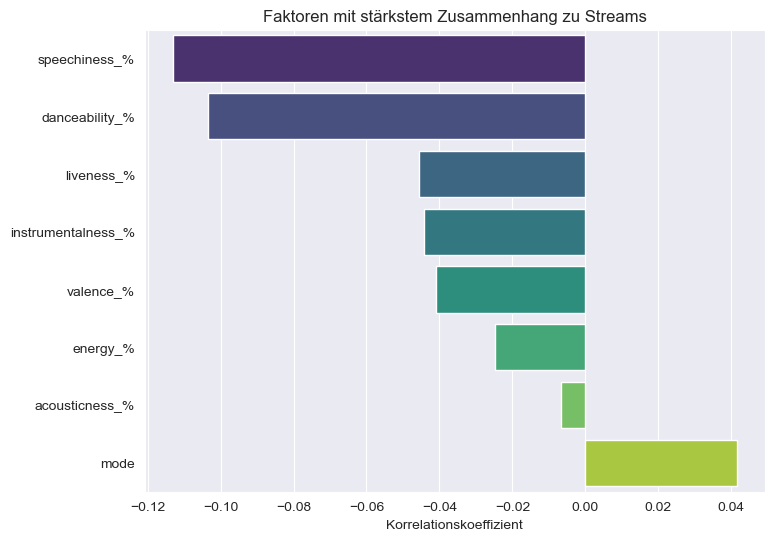

In [68]:
streams_corr = df_audio_features.corr(numeric_only=True)['streams'].drop('streams').sort_values()

plt.figure(figsize=(8,6))
sns.barplot(
    x=streams_corr.values,
    y=streams_corr.index,
    palette='viridis'
)
plt.title("Faktoren mit stärkstem Zusammenhang zu Streams")
plt.xlabel("Korrelationskoeffizient")
plt.show()

# Are there any seasonal trends in music releases and streams throughout the year?

In [6]:
df_copy = df.copy()

In [74]:
df_seasonal = df_copy[['streams', 'released_year', 'released_month', 'released_day']]
df_seasonal

,streams,released_year,released_month,released_day
0,1695712020,2002,5,26
1,57876440,2023,6,15
2,185550869,2022,3,23
3,325592432,2022,11,1
4,247689123,2022,7,14
...,...,...,...,...
944,1180094974,2020,4,17
945,56533272,2023,3,3
946,1007612429,2021,8,13
947,143573775,2023,4,12


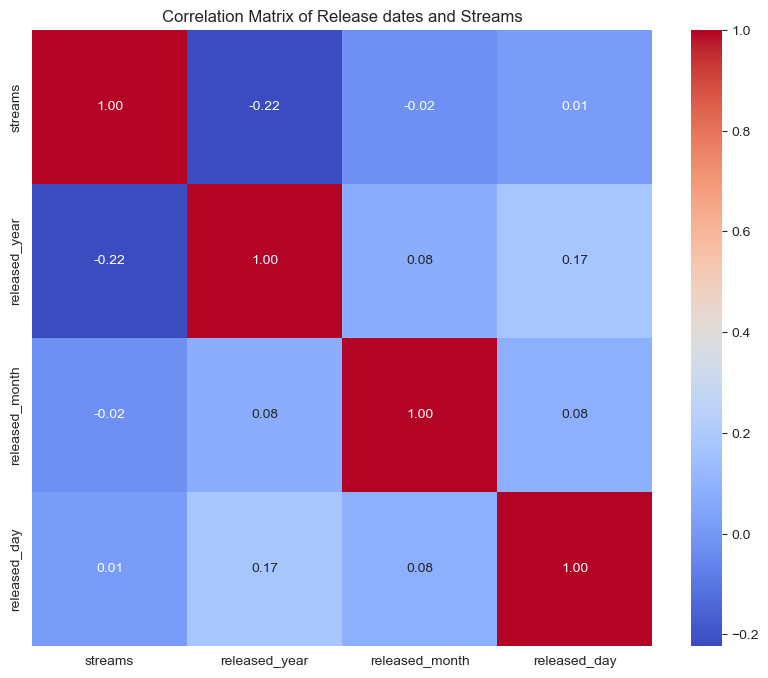

In [77]:
plt.figure(figsize=(10,8))
correlation_matrix_seasonal = df_seasonal.corr()
sns.heatmap(correlation_matrix_seasonal, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Release dates and Streams')
plt.show()

In [81]:
df_seasonal['season'] = df_seasonal['released_month'] % 12 // 3 + 1
# season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
# df_seasonal['season'] = df_seasonal['season'].map(season_mapping)

C:\Users\A200162055\AppData\Local\Temp\ipykernel_27148\927098262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasonal['season'] = df_seasonal['released_month'] % 12 // 3 + 1


In [82]:
df_seasonal

,streams,released_year,released_month,released_day,season
0,1695712020,2002,5,26,2
1,57876440,2023,6,15,3
2,185550869,2022,3,23,2
3,325592432,2022,11,1,4
4,247689123,2022,7,14,3
...,...,...,...,...,...
944,1180094974,2020,4,17,2
945,56533272,2023,3,3,2
946,1007612429,2021,8,13,3
947,143573775,2023,4,12,2


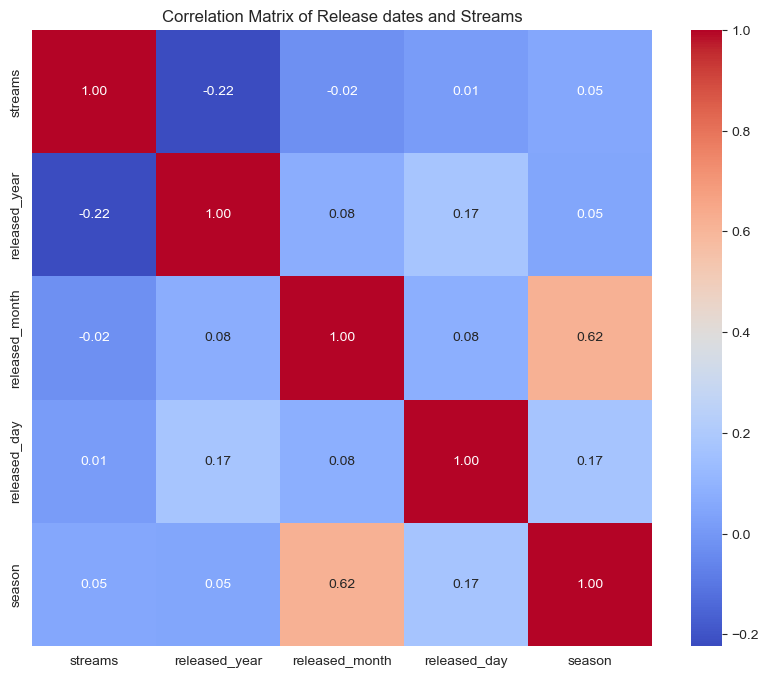

In [83]:
plt.figure(figsize=(10,8))
correlation_matrix_seasonal = df_seasonal.corr()
sns.heatmap(correlation_matrix_seasonal, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Release dates and Streams')
plt.show()

# What are the bangers in each year?

In [12]:
df_banger = df.copy()

In [41]:
df_banger = df_banger[['track_name', 'artist(s)_name', 'streams', 'released_year']]
df_banger_grouped = df_banger.groupby('released_year').agg(
        streams_max=('streams', 'max'),
        streams_sum=('streams', 'sum')
    ).sort_values(by='streams_sum', ascending=False)
df_banger_grouped

,streams_max,streams_sum
released_year,,
2022,2513188493,116402377962
2021,2665343922,73808103039
2019,3703895074,37870932581
2020,2557975762,34703731857
2017,3562543890,31457639060
2023,1316855716,25808484104
2016,2713922350,20242940464
2014,2280566092,16432612812
2013,2135158446,15862499834


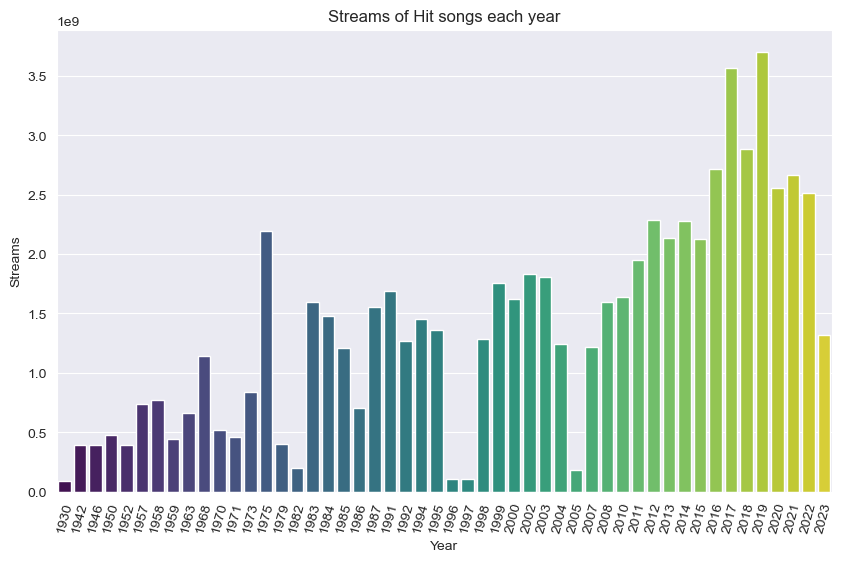

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_banger_grouped.index, y=df_banger_grouped['streams_max'], palette='viridis')
plt.title('Streams of Hit songs each year')
plt.xlabel('Year')
plt.xticks(rotation=75)
plt.ylabel('Streams')
plt.show()

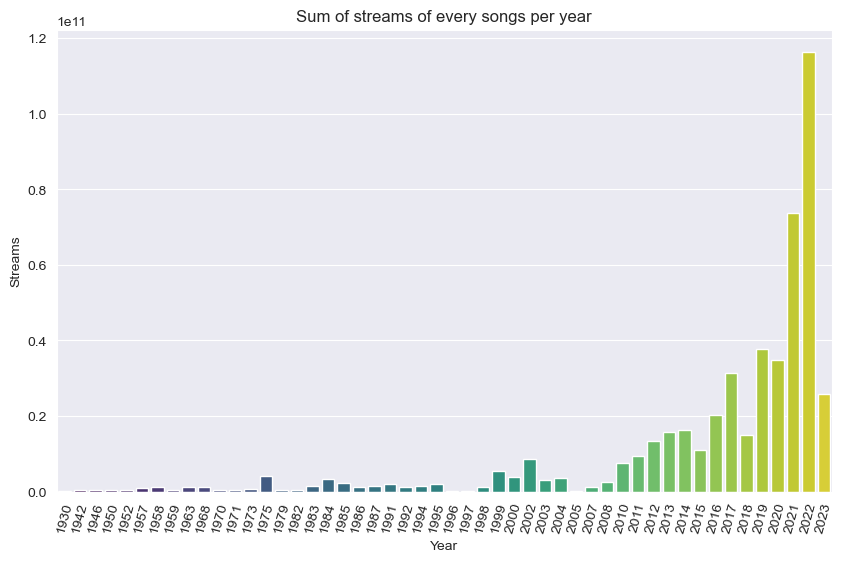

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_banger_grouped.index, y=df_banger_grouped['streams_sum'], palette='viridis')
plt.title('Sum of streams of every songs per year')
plt.xlabel('Year')
plt.xticks(rotation=75)
plt.ylabel('Streams')
plt.show()

# What distinguishes songs that just make the top list vs. those that dominate (e.g. top 10 vs. top 100)?

In [47]:
df_tracks = df.copy()

In [50]:
top_bottom_tracks = pd.concat([
    df_tracks.sort_values(by='streams', ascending=False).head(10),  # top 10
    df_tracks.sort_values(by='streams', ascending=False).tail(10)   # bottom 10
])
top_bottom_tracks = top_bottom_tracks.reset_index(drop=True)

top_bottom_tracks['track_artist'] = (
    top_bottom_tracks['track_name'] + ' - ' + top_bottom_tracks['artist(s)_name']
)

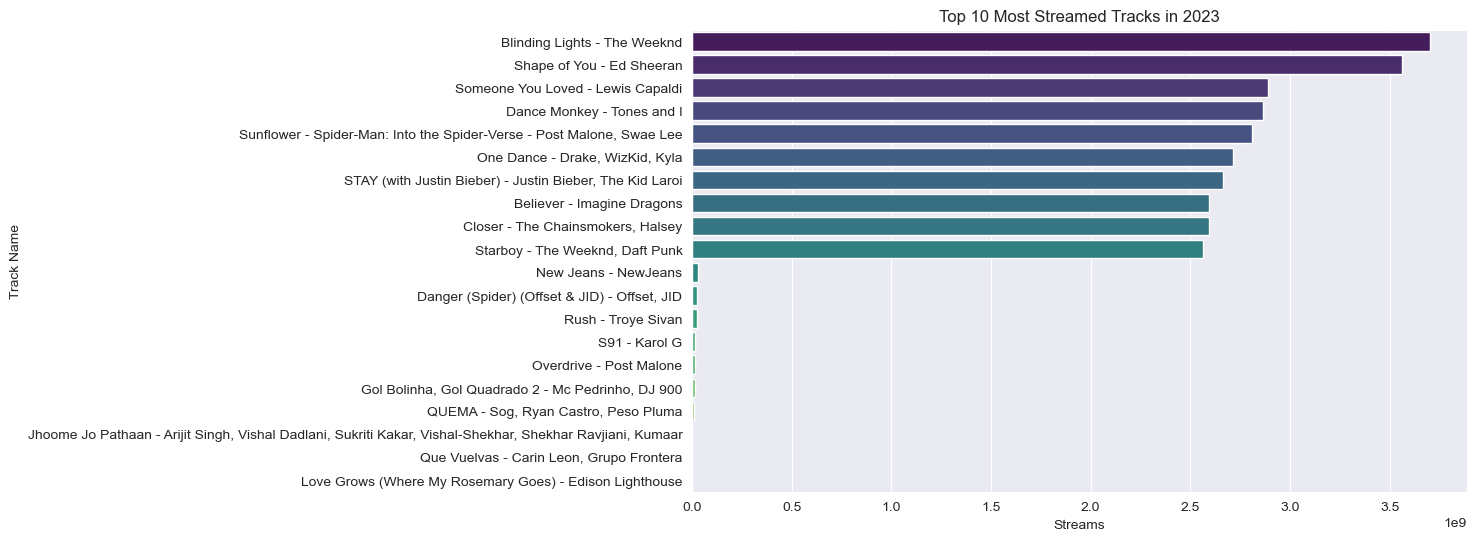

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='streams',
    y='track_artist',
    data=top_bottom_tracks,
    palette='viridis'
)
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.title('Top 10 Most Streamed Tracks in 2023')
plt.show()

In [56]:
top_bottom_tracks_short = top_bottom_tracks.drop(columns=['track_name', 'artist(s)_name', 'in_apple_charts', 'in_apple_playlists', 'in_deezer_charts', 'in_deezer_playlists', 'in_spotify_charts', 'in_spotify_playlists', 'in_shazam_charts'])
top_bottom_tracks_short

,streams,artist_count,released_year,released_month,released_day,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,speechiness_%,liveness_%,key,mode,track_artist
0,3703895074,1,2019,11,29,171,50,38,80,0,0,7,9,C#,Major,Blinding Lights - The Weeknd
1,3562543890,1,2017,1,6,96,83,93,65,58,0,8,9,C#,Minor,Shape of You - Ed Sheeran
2,2887241814,1,2018,11,8,110,50,45,41,75,0,3,11,C#,Major,Someone You Loved - Lewis Capaldi
3,2864791672,1,2019,5,10,98,82,54,59,69,0,10,18,F#,Minor,Dance Monkey - Tones and I
4,2808096550,2,2018,10,9,90,76,91,50,54,0,5,7,D,Major,Sunflower - Spider-Man: Into the Spider-Verse ...
5,2713922350,3,2016,4,4,104,77,36,63,1,0,5,36,C#,Major,"One Dance - Drake, WizKid, Kyla"
6,2665343922,2,2021,7,9,170,59,48,76,4,0,5,10,C#,Major,"STAY (with Justin Bieber) - Justin Bieber, The..."
7,2594040133,1,2017,1,31,125,77,74,78,4,0,11,23,A#,Minor,Believer - Imagine Dragons
8,2591224264,2,2016,5,31,95,75,64,52,41,0,3,11,G#,Major,"Closer - The Chainsmokers, Halsey"
9,2565529693,2,2016,9,21,186,68,49,59,16,0,28,13,G,Major,"Starboy - The Weeknd, Daft Punk"


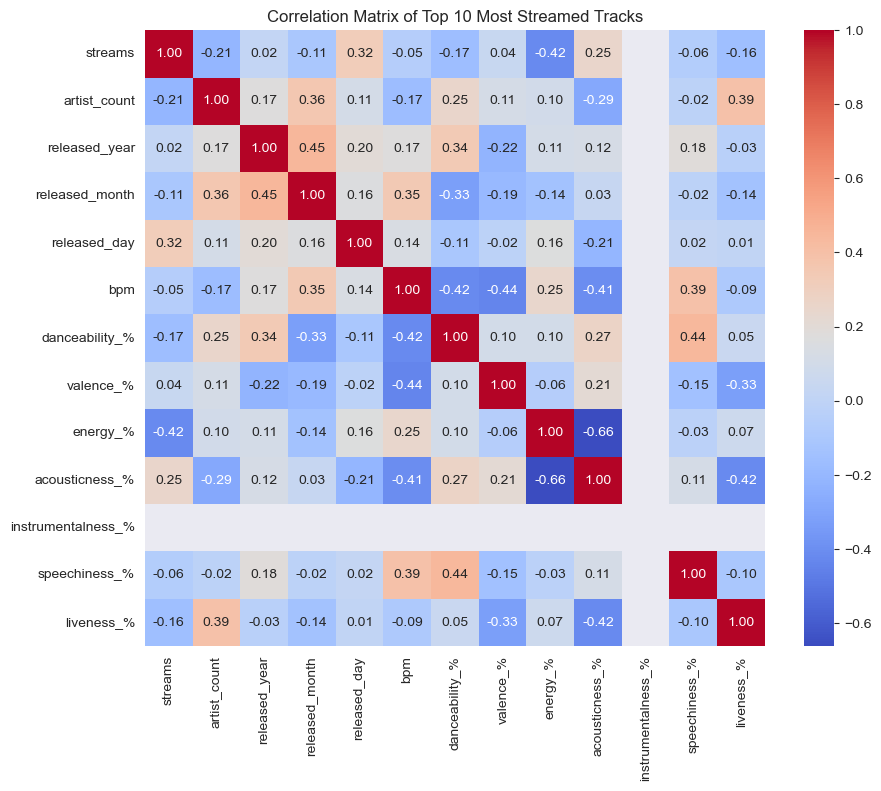

In [62]:
top_bottom_tracks_short.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(top_bottom_tracks_short.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 10 Most Streamed Tracks')
plt.show()

# When during the year are most songs released?

In [83]:
df_release_time = df.copy()

In [84]:
df_release_time = df_release_time.groupby('released_month').agg(total_streams=('streams', 'sum')).reset_index()
df_release_time

,released_month,total_streams
0,1,96758316210
1,2,21542363634
2,3,41026524341
3,4,25949740191
4,5,53205638976
5,6,36711630657
6,7,29171047142
7,8,29038222245
8,9,41140083774
9,10,42989875350


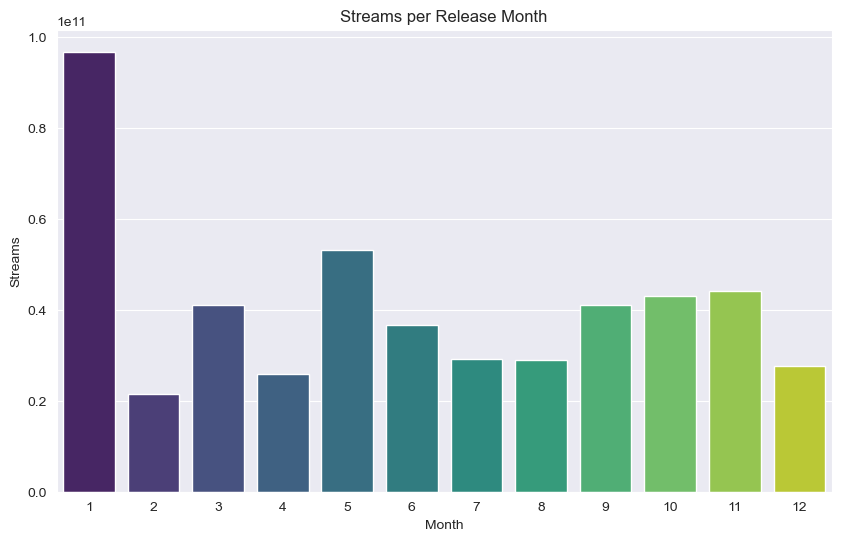

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='released_month',
    y='total_streams',
    data=df_release_time,
    palette='viridis'
)
plt.title('Streams per Release Month')
plt.xlabel('Month')
plt.ylabel('Streams')
plt.show()

In [86]:
df_releases_per_month = df.copy()

df_releases_per_month_grouped = df_releases_per_month.groupby('released_month').agg(count_tracks=('streams', 'count')).reset_index()
df_releases_per_month_grouped

,released_month,count_tracks
0,1,134
1,2,61
2,3,85
3,4,65
4,5,128
5,6,87
6,7,61
7,8,45
8,9,56
9,10,72


Text(0, 0.5, 'Tracks')

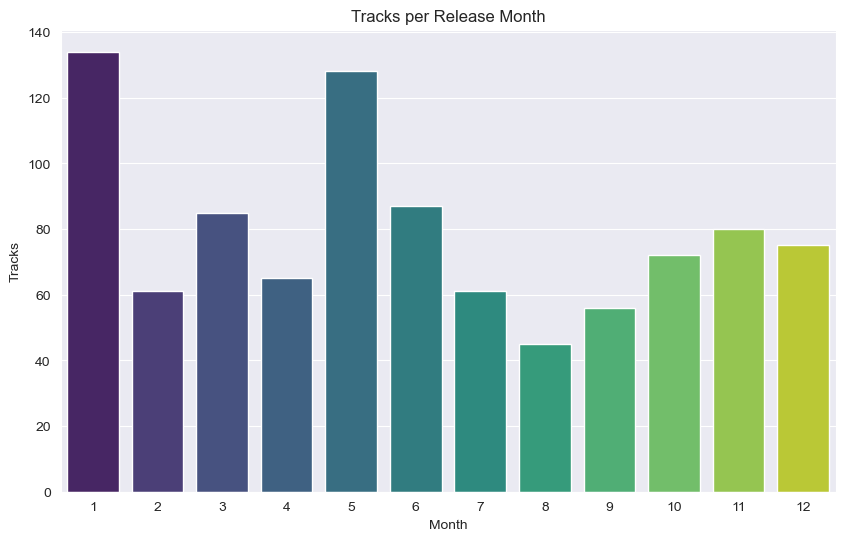

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='released_month',
    y='count_tracks',
    data=df_releases_per_month_grouped,
    palette='viridis'
)
plt.title('Tracks per Release Month')
plt.xlabel('Month')
plt.ylabel('Tracks')